# Libraries

In [1]:
from matplotlib import pyplot as plt
import numpy as np

# Distributions

In [2]:
def even_distribution(a, b, n):
    return np.linspace(a, b, n)
    
def chebyshev_distribution(a, b, n):
    def chebyshev(k):
        nonlocal a, b
        return np.longdouble(0.5) * ((a + b) + (b - a) * np.cos((2 * points + 1) * np.pi / (2 * n)))
    
    points = np.arange(n)
    return chebyshev(points)

# Hermite's Interpolation 

In [3]:
def derivative(f, x, acc, calc = True):
    if calc:
        return (-4*np.exp(-4 * np.sin(x))*np.cos(x))
    else:
        h = 2**(-acc)
        return (f(x + h) - f(x-h))/(2*h)


def matrix_res(x, f, acc = 20):
    n: int = len(x)
    matrix = [[0 for _ in range(n*2)] for _ in range(n*2)]
    for i in range(2*n):
        matrix[i][0] = (f(x[i//2]), (x[i//2], x[i//2]))
    for i in range(1, 2*n):
        for j in range(1, i+1):
            if i % 2 != 0 and j == 1:
                matrix[i][j] = (derivative(f, x[i//2], acc), (x[i//2], x[i//2]))
            else:
                matrix[i][j] = ((matrix[i][j-1][0] - matrix[i-1][j-1][0])/
                (matrix[i][j-1][1][1] - matrix[i-1][j-1][1][0]),
                (matrix[i-1][j-1][1][0], matrix[i][j-1][1][1]))                
    solution = [matrix[i][i][0] for i in range(2*n)]
    return solution


def sum_mult_solutions(x, x_dist, solution):
    prev = 1
    sum = 0
    for i in range(len(solution)):
        sum += prev*solution[i]
        prev *= (x - x_dist[i//2])
    return sum


def hermite(x_dist, f, x_plot, acc = 20):
    solved = matrix_res(x_dist, f, acc)
    y_plot = list(map(lambda v: sum_mult_solutions(v, x_dist, solved), x_plot))
    return x_plot, y_plot

# Polynomial

In [4]:
def polynomial(x):
    return np.exp(-4 * np.sin(x))

# Function plot

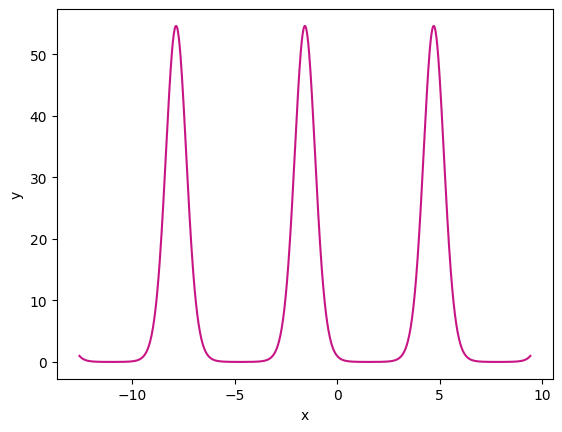

In [5]:
x = np.linspace(-4*np.pi, 3*np.pi, 1000)
y = np.exp(-4 * np.sin(x))

plt.plot(x, y, color='mediumvioletred')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Derivative plot

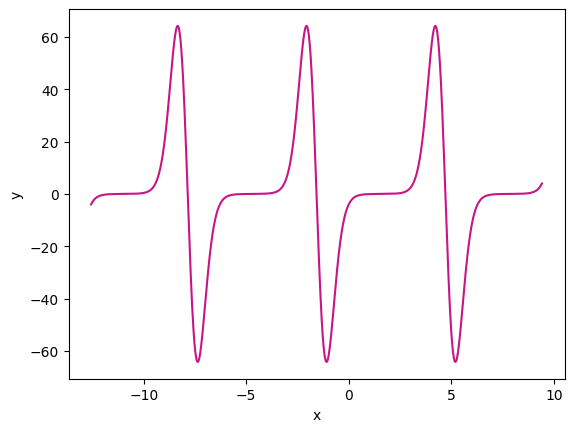

In [9]:
x = np.linspace(-4*np.pi, 3*np.pi, 1000)
y = (-4*np.exp(-4 * np.sin(x))*np.cos(x))

plt.plot(x, y, color='mediumvioletred')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

# Plot

In [12]:
def draw_plot(a, b, n, f, dist, draw):
    n1 = 500
    x_dist = dist(a, b, n)
    x_plot = np.linspace(a, b, n1)
    y_plot = [f(x_plot[i]) for i in range(len(x_plot))]
    y_scatt = [f(x_dist[i]) for i in range(len(x_dist))]
    x_her, y_her = hermite(x_dist, f, x_plot)
    
    if draw:
        plt.scatter(x_dist, y_scatt, color="black")
        plt.plot(x_her, y_her, color="darkmagenta") # given polynomial
        plt.plot(x_plot, y_plot, color="mediumvioletred") # my function
        plt.show()
        
    error = [abs(y_plot[i] - y_her[i]) for i in range(n1)]
    max_e = 0
    sq_error = 0
    for i in range(n1): 
        max_e = max(max_e, error[i])
        sq_error += error[i]**2
    sq_error /= n1
    print("max_err, \t\tsq_err, \t\tknots")
    print(f"{max_e}, \t{sq_error}, \t{n}")
    return max_e, sq_error, n
    


# Main function




Ilość węzłów: 3, rozmieszczenie równomierne, metoda Hermite'a



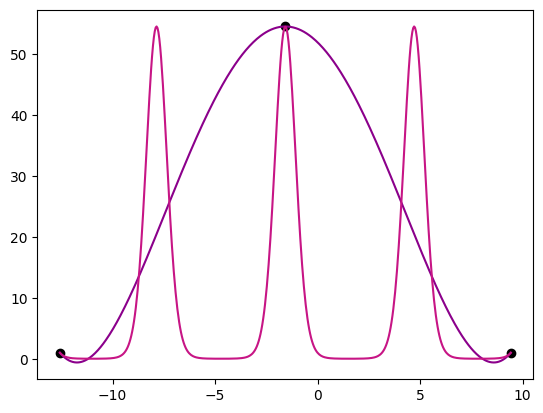

max_err, 		sq_err, 		knots
51.00817022339118, 	861.3128832922756, 	3



Ilość węzłów: 3, rozmieszczenie Czebysheva, metoda Hermite'a



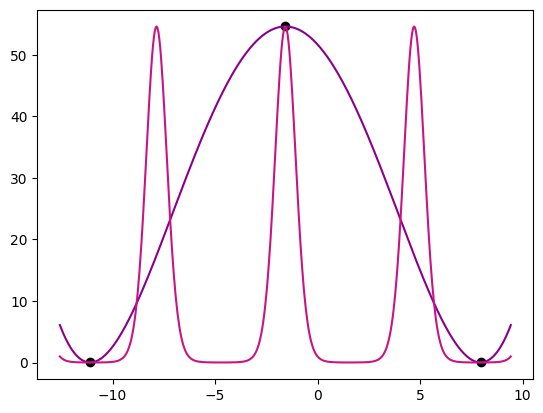

max_err, 		sq_err, 		knots
50.66694704933172, 	838.0752490707636, 	3



Ilość węzłów: 4, rozmieszczenie równomierne, metoda Hermite'a



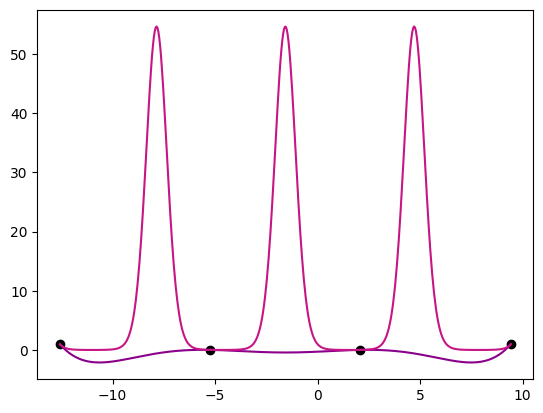

max_err, 		sq_err, 		knots
55.16306842511952, 	377.0045158269729, 	4



Ilość węzłów: 4, rozmieszczenie Czebysheva, metoda Hermite'a



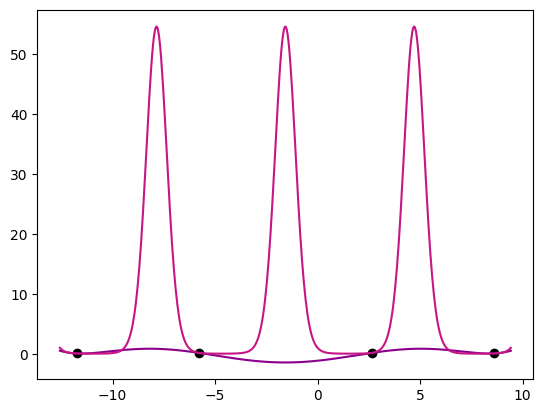

max_err, 		sq_err, 		knots
55.99639707313501, 	365.2399253848639, 	4



Ilość węzłów: 5, rozmieszczenie równomierne, metoda Hermite'a



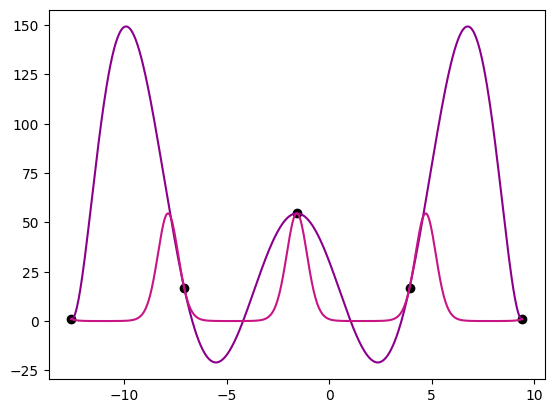

max_err, 		sq_err, 		knots
149.15263648873716, 	4703.1496249182, 	5



Ilość węzłów: 5, rozmieszczenie Czebysheva, metoda Hermite'a



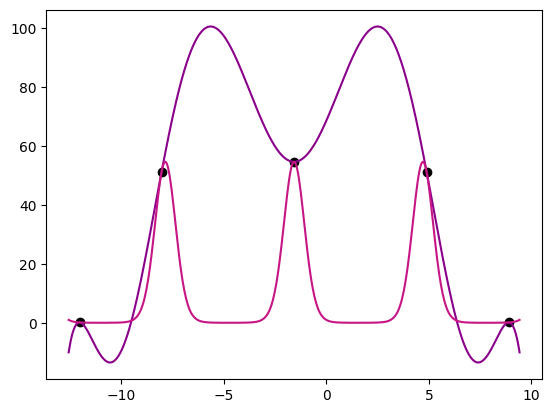

max_err, 		sq_err, 		knots
100.39276917104087, 	3248.1580422216693, 	5



Ilość węzłów: 7, rozmieszczenie równomierne, metoda Hermite'a



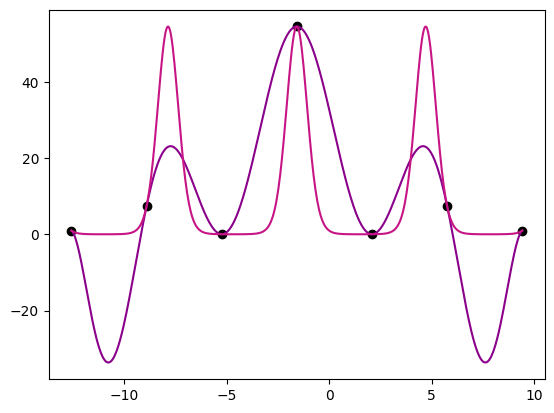

max_err, 		sq_err, 		knots
36.96941898272345, 	379.704979836829, 	7



Ilość węzłów: 7, rozmieszczenie Czebysheva, metoda Hermite'a



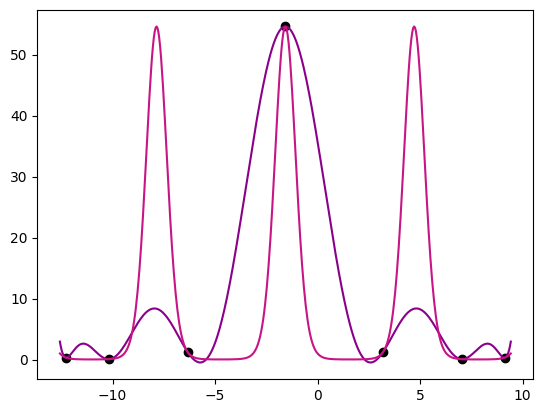

max_err, 		sq_err, 		knots
46.26609217242934, 	346.3791902226608, 	7



Ilość węzłów: 10, rozmieszczenie równomierne, metoda Hermite'a



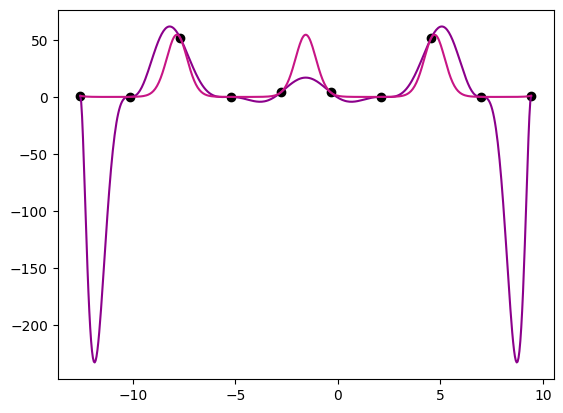

max_err, 		sq_err, 		knots
233.07500313864122, 	3826.2878457727247, 	10



Ilość węzłów: 10, rozmieszczenie Czebysheva, metoda Hermite'a



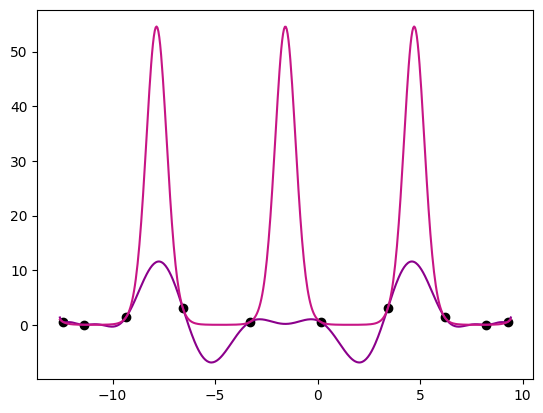

max_err, 		sq_err, 		knots
54.36344608041746, 	260.96171631368105, 	10



Ilość węzłów: 15, rozmieszczenie równomierne, metoda Hermite'a



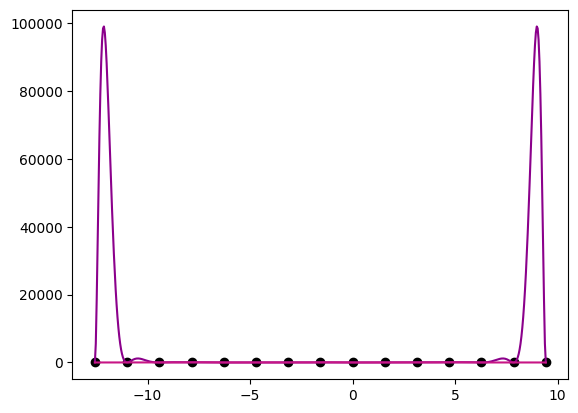

max_err, 		sq_err, 		knots
98979.24090575016, 	426377061.11137897, 	15



Ilość węzłów: 15, rozmieszczenie Czebysheva, metoda Hermite'a



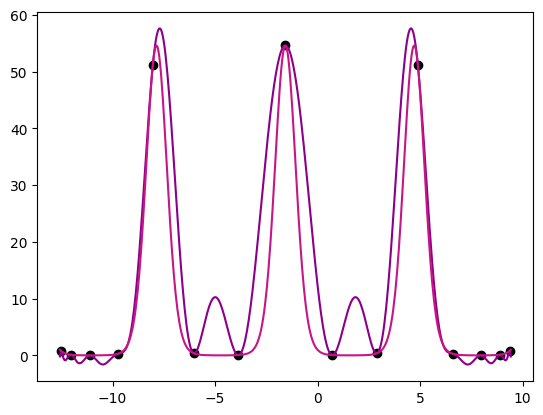

max_err, 		sq_err, 		knots
24.904339744587176, 	82.33671043222812, 	15



Ilość węzłów: 20, rozmieszczenie równomierne, metoda Hermite'a



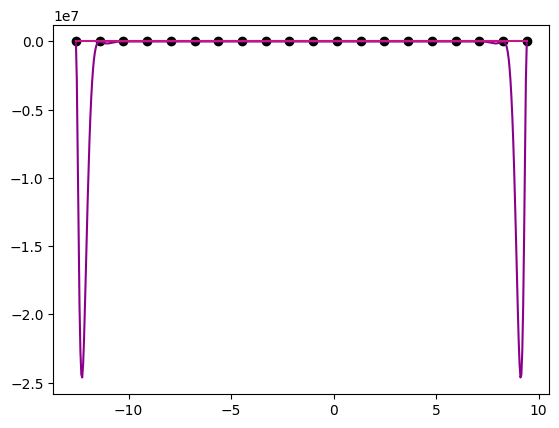

max_err, 		sq_err, 		knots
24614157.005538676, 	18501935871464.184, 	20



Ilość węzłów: 20, rozmieszczenie Czebysheva, metoda Hermite'a



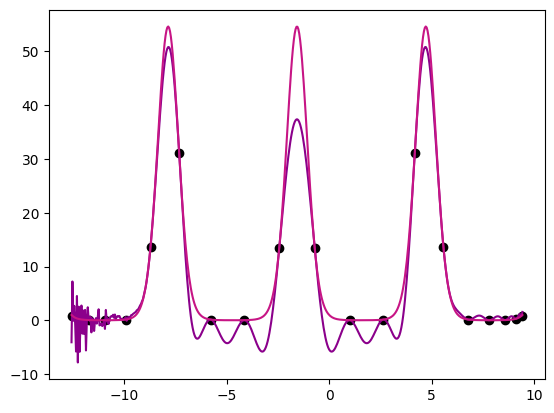

max_err, 		sq_err, 		knots
17.207559364895552, 	14.819606247884565, 	20



Ilość węzłów: 30, rozmieszczenie równomierne, metoda Hermite'a



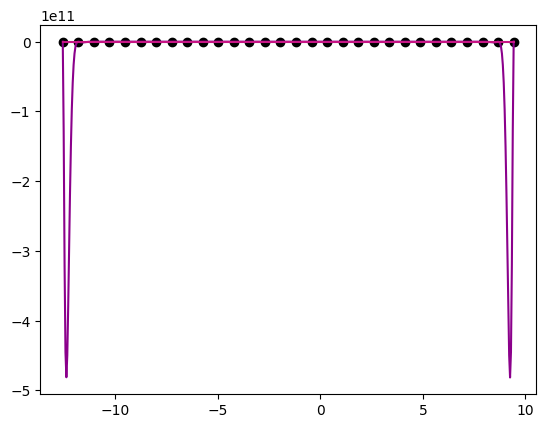

max_err, 		sq_err, 		knots
481705714036.5316, 	4.276920592232552e+21, 	30



Ilość węzłów: 30, rozmieszczenie Czebysheva, metoda Hermite'a



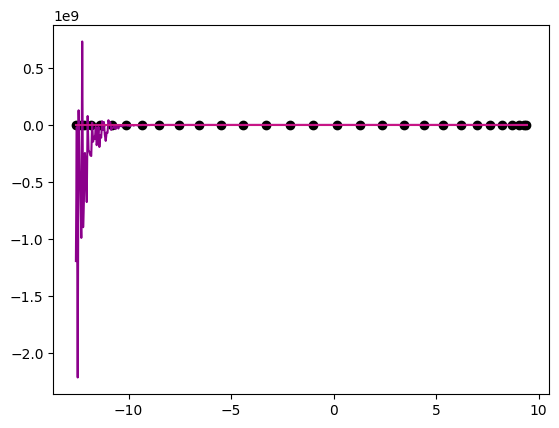

max_err, 		sq_err, 		knots
2210078379.164027, 	2.121853191395931e+16, 	30



Ilość węzłów: 40, rozmieszczenie równomierne, metoda Hermite'a



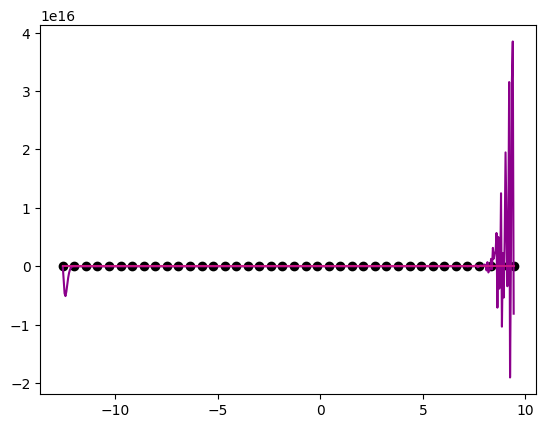

max_err, 		sq_err, 		knots
3.847586050648602e+16, 	9.833131668827576e+30, 	40



Ilość węzłów: 40, rozmieszczenie Czebysheva, metoda Hermite'a



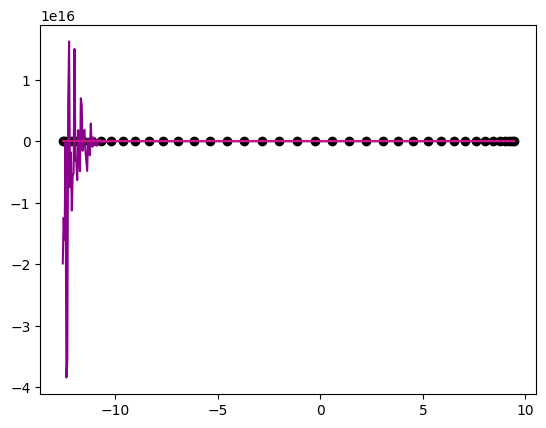

max_err, 		sq_err, 		knots
3.838425073871179e+16, 	9.118583264536206e+30, 	40



Ilość węzłów: 50, rozmieszczenie równomierne, metoda Hermite'a



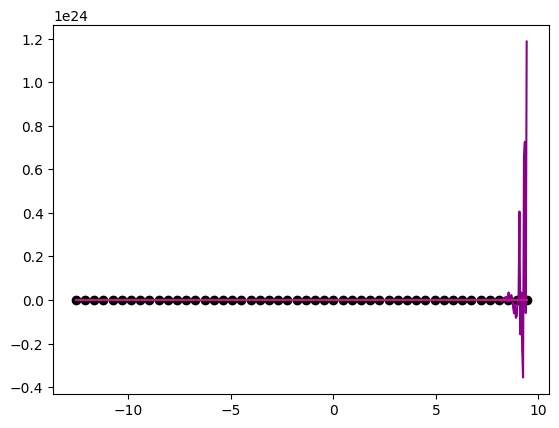

max_err, 		sq_err, 		knots
1.187232296819306e+24, 	5.495504008774016e+45, 	50



Ilość węzłów: 50, rozmieszczenie Czebysheva, metoda Hermite'a



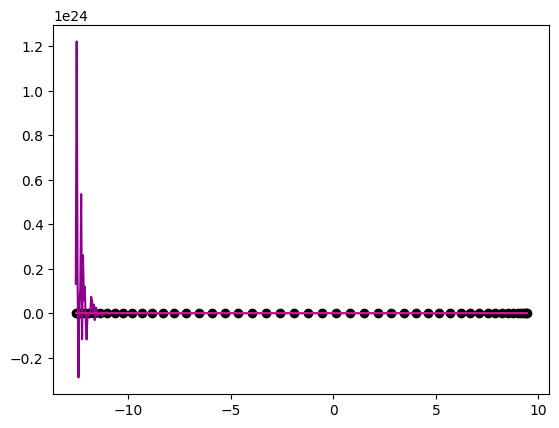

max_err, 		sq_err, 		knots
1.221748716447204e+24, 	4.0939473735108895e+45, 	50


In [16]:
start = -4 * np.pi
end = 3 * np.pi

knots_numbers = [3, 4, 5, 7, 10, 15, 20, 30, 40, 50]

for knots_nb in knots_numbers:
    print(f"\n\n\nIlość węzłów: {knots_nb}, rozmieszczenie równomierne, metoda Hermite'a\n")
    draw_plot(start, end, knots_nb, polynomial, even_distribution, hermite)
    
    print(f"\n\n\nIlość węzłów: {knots_nb}, rozmieszczenie Czebysheva, metoda Hermite'a\n")
    draw_plot(start, end, knots_nb, polynomial, chebyshev_distribution, hermite)
